We start by including the relevant libraries. One useful way to have data in python is with a numpy array. The probability for a die with N sides to come up with side n is 1/N if n<=N, else it is 0. Thus for k throws, the probability is 1/N^k if all numbers were possible, else it is 0.

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
data = np.array([3, 6, 1, 5, 7, 4]) # defines the data (the numbers of the throws)

# The next lines can be used to instead simulate an experiment with an arbitrary die
#data = np.zeros(20)
#for i in range(0,np.size(data)):
#    data[i] = random.randint(1,13) # 13-sided die

nDatapoints = np.size(data)
print("The" , nDatapoints , "data points are ", data)

# the priors represent out initial knowledge about the dice. Switch the comment to use equal prior probabilities instead
priors = np.array([0, 0, 0.1/13, 0.1, 0.1/13, 0.5, 0.1/13, 0.1/13, 0.1/13, 0.1, 0.1/13, 0.1, 0.1/13, 0.1/13, 0.1/13, 0.1/13, 0.1/13, 0.1/13, 0.1/13, 0.1])
#priors = np.ones(20)/20. # equal probability

# the array "sides" just saves the number of sides corresponding to the dice,
# so prior[i] belongs to a dice with sides[i] sides
sides = priors*0
for i in range(1, np.size(sides)+1):
    sides[i-1] = i
posteriors = priors*0.


#First do all steps at once; for this we need to find the largest element of the data array and compare it to
#the number of sides on the die we consider
largestElement = 0
for i in data: # or use data.max()
    if i > largestElement:
        largestElement = i
print("The highest throw gave the result" , largestElement)
# Calculate posteriors by multiplying with likelihood for numerator of Bayes' formula
for i in range(0, np.size(sides)):
    if largestElement <= sides[i]:
        posteriors[i] = priors[i] / math.pow(sides[i], nDatapoints) # We multiply the prior by the likelihood,
    else:                       # meaning this calculates the numerator of Bayes' formula
        posteriors[i] = 0.
# Now we calculate the denominator of Bayes' formula. This is just the normalization so all posterior
norm = 0.      # probabilities add up to 1
for i in posteriors: # or use posteriors.sum()
    norm += i
posteriors /= norm # divides all elements of the array by the constant
# Now we can just output the results
for i in range(0, np.size(sides)):
    print("The die has ", int(sides[i]), " side(s) with probability ", posteriors[i])

The 6 data points are  [3 6 1 5 7 4]
The highest throw gave the result 7
The die has  1  side(s) with probability  0.0
The die has  2  side(s) with probability  0.0
The die has  3  side(s) with probability  0.0
The die has  4  side(s) with probability  0.0
The die has  5  side(s) with probability  0.0
The die has  6  side(s) with probability  0.0
The die has  7  side(s) with probability  0.258378156730653
The die has  8  side(s) with probability  0.11595890717012251
The die has  9  side(s) with probability  0.05719907150785242
The die has  10  side(s) with probability  0.39517311289565976
The die has  11  side(s) with probability  0.017158840006753703
The die has  12  side(s) with probability  0.13234267594724544
The die has  13  side(s) with probability  0.00629772832552616
The die has  14  side(s) with probability  0.004037158698916453
The die has  15  side(s) with probability  0.0026686798802703624
The die has  16  side(s) with probability  0.0018118579245331643
The die has  17  sid

We now know all the posterior probabilities for all sides. But it would be nice to know how each indidivual number changes our knowledge. Also, we want some practice with plotting. For the second part to run, the first one has to be run already to fill the objects. For each single throw, we use as the prior the posterior from the previous step. Since Bayesian inference is consistent, thi will give us the exact same result in the end. One difficulty is how to save the information we get in Python so we can later plot it. Here the choice is to use a 2-d matrix, StepByStepPosteriors[j,i]. StepByStepPosteriors[j,i] gives the probability for a die with j sides after i datapoints are considered. i=0 is defined to be the prior.

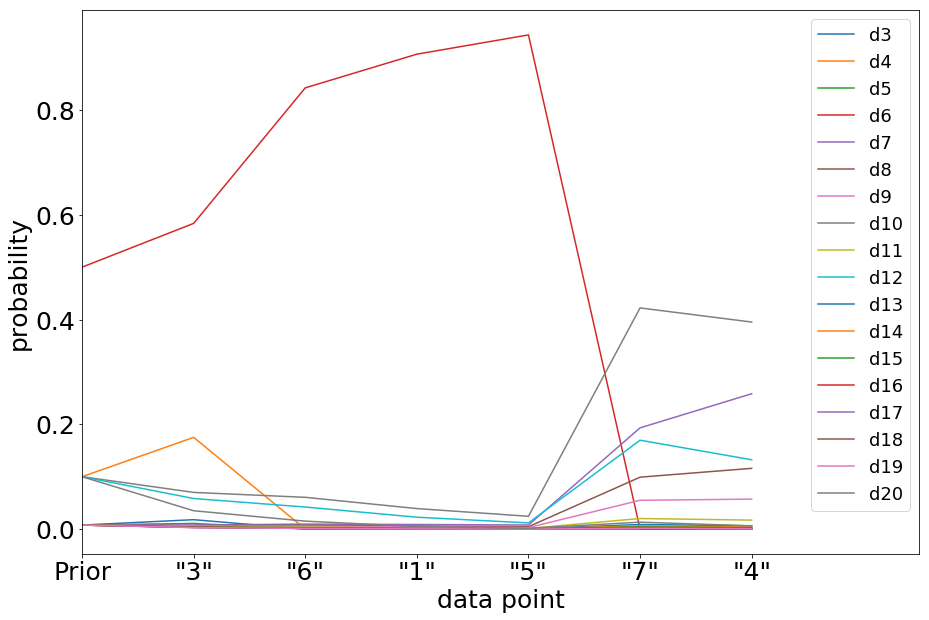

In [123]:

# now the same, but step by step
#StepByStepPosteriors = np.array(priors, ndmin=2)
StepByStepPosteriors = np.zeros((np.size(priors), nDatapoints+1)) # Includes Priors as initial step

for i in range(0, np.size(priors)): # Fill in the priors
    StepByStepPosteriors[i,0] = priors[i]
    
# Now go through each step and multiply the previous probabilities (the priors for this step) with 1/N
# or with 0 if the throw is imposible
for i in range(1, nDatapoints+1):
    for j in range(0, np.size(priors)):
        if data[i-1] <= sides[j]:
            StepByStepPosteriors[j,i] = StepByStepPosteriors[j,i-1]/sides[j]
        else:
            StepByStepPosteriors[j,i] = 0
    # again, the denominator is a normalization
    norm = 0.
    for j in range(0, np.size(priors)):
        norm += StepByStepPosteriors[j,i]
    for j in range(0, np.size(priors)):
        StepByStepPosteriors[j,i] /= norm
        
# The plot function takes a numpy array as input, but we have a matrix
# In this case we make one numpy array for each possible die and save them
# in a Python list

steps = np.arange(nDatapoints+1) # This just makes an array 0, 1, ... to give the x-axis values of the
                                # different steps
plotpoints = [0] * np.size(priors) # this just initializes the list with the number of elements
plt.figure(figsize=(15,10)) # this sets the size of the plot
for i in range(2, np.size(priors)):
    plotpoints[i] = StepByStepPosteriors[i,:] # this is a way to get just one row or column from a matrix
    plt.plot(steps,plotpoints[i], label="d"+str(i+1)) # The label is later used in the legend
# Python automatically gives different line colors to the lines
plt.ylabel('probability') # Always label the axes
plt.xlabel('data point')
plt.legend(loc='upper right')
#plt.yscale('log') # this line switches from a plot linear in y to a log plot, can be toggeled

# The next few lines are just there to plot the numbers from the throws on the tick marks
tickmarks = [0]*(nDatapoints+1)
tickmarks[0] = "Prior"
for i in range(1, nDatapoints+1):
    tickmarks[i] = "\""+str(int(data[i-1]))+"\""
plt.xticks(np.arange(nDatapoints+1), tickmarks)

plt.rcParams.update({'font.size': 18}) # make the font bigger, so it is easier to read

plt.xlim([0, nDatapoints+1.5]) # set the x-Axis range; make a bit of space for the legend on the right
plt.show()

Modify the priors to see what happens if you have different information. For example: One dice of each type is in a bucket an drawn at random (equal probabilities for all). You can also try to use different data by modifying the array in the beginning.